In [5]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt

from utils.data import download_data
from utils.umap import get_umap_embeddings_of_dataset

In [2]:
download_data()

Data is already downloaded. Skipping download.


In [ ]:
# WARNING!! Dataset is very large (1.7GB), so this will take a long time. 
# Using 0.01 of the images takes about a minute, but larger number take way way more
embeddings = get_umap_embeddings_of_dataset(process_size=0.01)

Loading images...
2025 images loaded      
Getting UMAP embeddings...
Saving embeddings...
Embeddings saved to: /Users/coco/Documents/ICAI/master/geometria-de-la-informacion/proyecto/umap-autoencoder/data/umap_embeddings/embeddings_0.01.npy


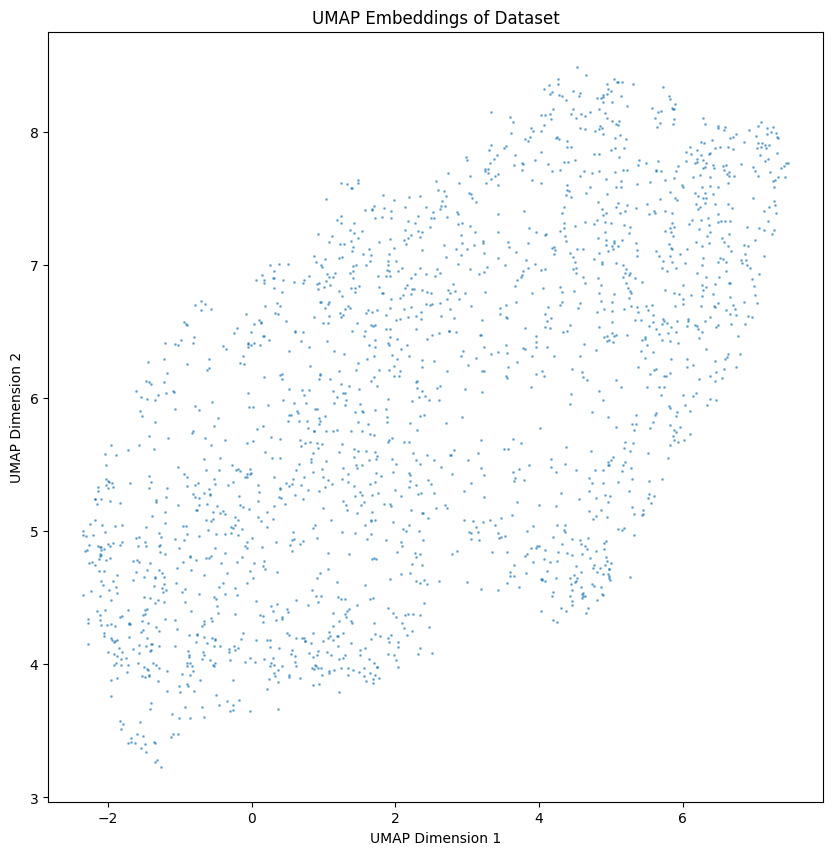

In [6]:
# Plot embeddings
plt.figure(figsize=(10, 10))
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=1, alpha=0.5)
plt.title('UMAP Embeddings of Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()